In [7]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_gaussian_quantiles

**Construct dataset**

**Gaussian 1**

In [8]:
X1, y1 = make_gaussian_quantiles(cov=3., n_samples=1000, n_features=2, n_classes=2, random_state=1)
X1 = pd.DataFrame(X1,columns=['x','y'])
y1 = pd.Series(y1)

**Gaussian 2**

In [9]:
X2, y2 = make_gaussian_quantiles(mean=(4,4), cov=1, n_samples=500, n_features=2, n_classes=2, random_state=1)
X2 = pd.DataFrame(X2, columns=['x','y'])
y2 = pd.Series(y2)

**Combine the gaussians**

In [10]:
df = pd.DataFrame(np.concatenate((X1, X2)))
y = pd.Series(np.concatenate((y1, - y2 + 1)))
df['y'] = y

In [11]:
df

,0,1,y
0,-1.396342,0.084977,0
1,1.878268,-0.190694,0
2,-1.910399,1.315481,1
3,1.517623,0.213485,0
4,-3.422065,-1.020059,1
...,...,...,...
1495,5.044994,4.608515,0
1496,3.533845,5.384991,0
1497,4.309817,5.051321,1
1498,5.693809,4.196870,0


In [12]:
df['y'].value_counts()

1    750
0    750
Name: y, dtype: int64

We don't want equal distribution for 0 and 1.

In [14]:
df = df.sample(1500)[0:1000]

In [15]:
df['y'].value_counts()

1    503
0    497
Name: y, dtype: int64

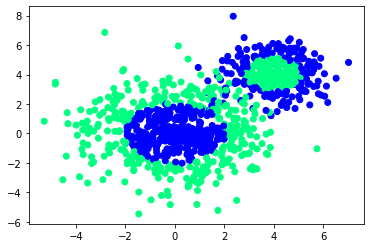

In [17]:
import matplotlib.pyplot as plt
plt.scatter(df.iloc[:,0],df.iloc[:,1],c=df.iloc[:,-1],cmap='winter')

**Step 1 : Calculate log(odds) to find the prediction 'pre1'**

In [18]:
df['pre1'] = np.log(503/497)

In [19]:
df

,0,1,y,pre1
382,0.008258,0.959994,0,0.012
611,-1.208642,-1.001690,0,0.012
532,-2.018217,-0.736847,1,0.012
710,2.933763,0.340988,1,0.012
352,3.177824,0.977540,1,0.012
...,...,...,...,...
515,-0.723127,0.228254,0,0.012
253,-0.963484,-4.504444,1,0.012
1249,3.436211,4.089686,1,0.012
372,1.764185,2.131389,1,0.012


**Converting log(odds) to probability**

In [20]:
p = np.exp(0.012)/(1+np.exp(0.012))
p

0.5029999640005185

In [21]:
df['pre1'] = p

In [22]:
df

,0,1,y,pre1
382,0.008258,0.959994,0,0.503
611,-1.208642,-1.001690,0,0.503
532,-2.018217,-0.736847,1,0.503
710,2.933763,0.340988,1,0.503
352,3.177824,0.977540,1,0.503
...,...,...,...,...
515,-0.723127,0.228254,0,0.503
253,-0.963484,-4.504444,1,0.503
1249,3.436211,4.089686,1,0.503
372,1.764185,2.131389,1,0.503


**Step 2 : Calculate the residual 'res1'**

In [23]:
df['res1'] = df['y'] - df['pre1']
df

,0,1,y,pre1,res1
382,0.008258,0.959994,0,0.503,-0.503
611,-1.208642,-1.001690,0,0.503,-0.503
532,-2.018217,-0.736847,1,0.503,0.497
710,2.933763,0.340988,1,0.503,0.497
352,3.177824,0.977540,1,0.503,0.497
...,...,...,...,...,...
515,-0.723127,0.228254,0,0.503,-0.503
253,-0.963484,-4.504444,1,0.503,0.497
1249,3.436211,4.089686,1,0.503,0.497
372,1.764185,2.131389,1,0.503,0.497


**Step 3 : Create a decision tree with input as column '0' and '1' and output as 'res1'**

We will use DecisionTreeRegressor because the output column 'res1' is numerical.

In [24]:
from sklearn.tree import DecisionTreeRegressor

In [25]:
tree1 = DecisionTreeRegressor(max_leaf_nodes=8)

In [27]:
tree1.fit(df.iloc[:,0:2],df.iloc[:,-1])

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=8,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

[Text(83.7, 201.90857142857143, 'X[1] <= -1.817\nmse = 0.25\nsamples = 1000\nvalue = 0.0'),
 Text(41.85, 170.84571428571428, 'mse = 0.03\nsamples = 97\nvalue = 0.466'),
 Text(125.55000000000001, 170.84571428571428, 'X[0] <= -1.96\nmse = 0.248\nsamples = 903\nvalue = -0.05'),
 Text(83.7, 139.78285714285715, 'mse = 0.0\nsamples = 75\nvalue = 0.497'),
 Text(167.4, 139.78285714285715, 'X[0] <= 1.541\nmse = 0.241\nsamples = 828\nvalue = -0.1'),
 Text(83.7, 108.72, 'X[1] <= 1.92\nmse = 0.16\nsamples = 391\nvalue = -0.304'),
 Text(41.85, 77.65714285714284, 'mse = 0.062\nsamples = 331\nvalue = -0.437'),
 Text(125.55000000000001, 77.65714285714284, 'mse = 0.062\nsamples = 60\nvalue = 0.43'),
 Text(251.10000000000002, 108.72, 'X[1] <= 5.109\nmse = 0.243\nsamples = 437\nvalue = 0.083'),
 Text(209.25, 77.65714285714284, 'X[0] <= 4.955\nmse = 0.224\nsamples = 388\nvalue = 0.157'),
 Text(167.4, 46.59428571428572, 'X[0] <= 2.152\nmse = 0.189\nsamples = 339\nvalue = 0.243'),
 Text(125.55000000000001, 

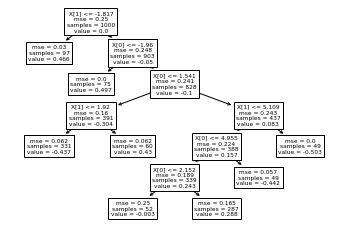

In [28]:
from sklearn.tree import plot_tree
plot_tree(tree1)

In [29]:
df['leaf_index1'] = tree1.apply(df.iloc[:,0:2])
df

,0,1,y,pre1,res1,leaf_index1
382,0.008258,0.959994,0,0.503,-0.503,7
611,-1.208642,-1.001690,0,0.503,-0.503,7
532,-2.018217,-0.736847,1,0.503,0.497,3
710,2.933763,0.340988,1,0.503,0.497,14
352,3.177824,0.977540,1,0.503,0.497,14
...,...,...,...,...,...,...
515,-0.723127,0.228254,0,0.503,-0.503,7
253,-0.963484,-4.504444,1,0.503,0.497,1
1249,3.436211,4.089686,1,0.503,0.497,14
372,1.764185,2.131389,1,0.503,0.497,13


In [30]:
df['leaf_index1'].value_counts()

7     331
14    287
1      97
3      75
8      60
13     52
12     49
10     49
Name: leaf_index1, dtype: int64

In [31]:
def return_logs(leaf):
  
  num = df[df['leaf_index1'] == leaf]['res1'].sum()
  den = sum(df[df['leaf_index1'] == leaf]['pre1'] * (1 - df[df['leaf_index1'] == leaf]['pre1']))
  return round(num/den,2)

In [32]:
df['log1'] = df['leaf_index1'].apply(return_logs)

In [33]:
df

,0,1,y,pre1,res1,leaf_index1,log1
382,0.008258,0.959994,0,0.503,-0.503,7,-1.75
611,-1.208642,-1.001690,0,0.503,-0.503,7,-1.75
532,-2.018217,-0.736847,1,0.503,0.497,3,1.99
710,2.933763,0.340988,1,0.503,0.497,14,1.15
352,3.177824,0.977540,1,0.503,0.497,14,1.15
...,...,...,...,...,...,...,...
515,-0.723127,0.228254,0,0.503,-0.503,7,-1.75
253,-0.963484,-4.504444,1,0.503,0.497,1,1.86
1249,3.436211,4.089686,1,0.503,0.497,14,1.15
372,1.764185,2.131389,1,0.503,0.497,13,-0.01


**Step 4 : Calculate second prediction 'pre2'**

Learning rate = 1

In [36]:
df['pre2'] = 0.012 + df['log1']

In [37]:
df

,0,1,y,pre1,res1,leaf_index1,log1,pre2
382,0.008258,0.959994,0,0.503,-0.503,7,-1.75,-1.738
611,-1.208642,-1.001690,0,0.503,-0.503,7,-1.75,-1.738
532,-2.018217,-0.736847,1,0.503,0.497,3,1.99,2.002
710,2.933763,0.340988,1,0.503,0.497,14,1.15,1.162
352,3.177824,0.977540,1,0.503,0.497,14,1.15,1.162
...,...,...,...,...,...,...,...,...
515,-0.723127,0.228254,0,0.503,-0.503,7,-1.75,-1.738
253,-0.963484,-4.504444,1,0.503,0.497,1,1.86,1.872
1249,3.436211,4.089686,1,0.503,0.497,14,1.15,1.162
372,1.764185,2.131389,1,0.503,0.497,13,-0.01,0.002


**Converting log(odds) to probability**

In [38]:
df['pre2'] = np.exp(df['pre2'])/(1+np.exp(df['pre2']))

In [39]:
df

,0,1,y,pre1,res1,leaf_index1,log1,pre2
382,0.008258,0.959994,0,0.503,-0.503,7,-1.75,0.149567
611,-1.208642,-1.001690,0,0.503,-0.503,7,-1.75,0.149567
532,-2.018217,-0.736847,1,0.503,0.497,3,1.99,0.881007
710,2.933763,0.340988,1,0.503,0.497,14,1.15,0.761696
352,3.177824,0.977540,1,0.503,0.497,14,1.15,0.761696
...,...,...,...,...,...,...,...,...
515,-0.723127,0.228254,0,0.503,-0.503,7,-1.75,0.149567
253,-0.963484,-4.504444,1,0.503,0.497,1,1.86,0.866690
1249,3.436211,4.089686,1,0.503,0.497,14,1.15,0.761696
372,1.764185,2.131389,1,0.503,0.497,13,-0.01,0.500500


**Step 5 : Calculate residual 'res2' for second prediction**

In [40]:
df['res2'] = df['y'] - df['pre2']
df

,0,1,y,pre1,res1,leaf_index1,log1,pre2,res2
382,0.008258,0.959994,0,0.503,-0.503,7,-1.75,0.149567,-0.149567
611,-1.208642,-1.001690,0,0.503,-0.503,7,-1.75,0.149567,-0.149567
532,-2.018217,-0.736847,1,0.503,0.497,3,1.99,0.881007,0.118993
710,2.933763,0.340988,1,0.503,0.497,14,1.15,0.761696,0.238304
352,3.177824,0.977540,1,0.503,0.497,14,1.15,0.761696,0.238304
...,...,...,...,...,...,...,...,...,...
515,-0.723127,0.228254,0,0.503,-0.503,7,-1.75,0.149567,-0.149567
253,-0.963484,-4.504444,1,0.503,0.497,1,1.86,0.866690,0.133310
1249,3.436211,4.089686,1,0.503,0.497,14,1.15,0.761696,0.238304
372,1.764185,2.131389,1,0.503,0.497,13,-0.01,0.500500,0.499500
